In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [4]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

C:\Users\OLEGVIOLA\AppData\Local\Temp\ipykernel_11048\3063289133.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000
2015-08-04,25.675560,26.360898,25.364246,26.298188,496554400
2015-08-05,25.845776,26.302668,25.106684,25.297056,397250400
2015-08-06,25.902021,26.210246,25.674792,26.091006,211612000
2015-08-07,25.989763,26.154000,25.760284,25.778283,154681600
...,...,...,...,...,...
2025-07-28,214.050003,214.850006,213.059998,214.029999,37858000
2025-07-29,211.270004,214.809998,210.820007,214.179993,51411700


# 2. DAta Exploration & Viasualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,104.900698,105.955890,103.740570,104.805160,1.085414e+08
std,69.242686,69.923397,68.485656,69.174546,6.375751e+07
min,20.647455,20.951433,20.448615,20.569750,2.323470e+07
25%,39.672644,40.090926,39.214519,39.677778,6.589765e+07
50%,95.610283,97.163178,94.040395,96.402524,9.348760e+07
75%,165.904343,167.614274,164.088190,165.827032,1.315472e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [10]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000
2015-08-04,25.675554,26.360892,25.364241,26.298182,496554400
2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400
2015-08-06,25.902012,26.210236,25.674783,26.090996,211612000
2015-08-07,25.989759,26.153996,25.760280,25.778279,154681600


In [12]:
df = df.reset_index()

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000
1,2015-08-04,25.675554,26.360892,25.364241,26.298182,496554400
2,2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400
3,2015-08-06,25.902012,26.210236,25.674783,26.090996,211612000
4,2015-08-07,25.989759,26.153996,25.760280,25.778279,154681600


Text(0, 0.5, 'Close Price')

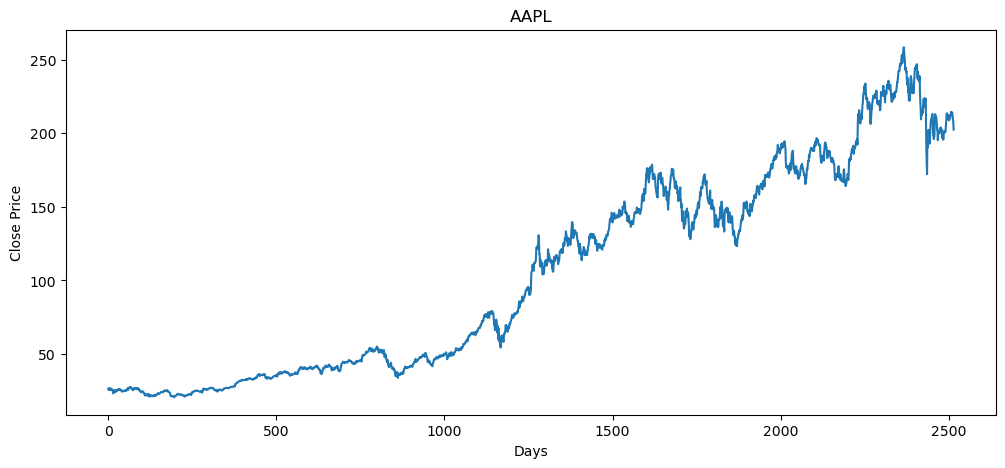

In [17]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

In [21]:
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [22]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [23]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [24]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000,NaN
1,2015-08-04,25.675554,26.360892,25.364241,26.298182,496554400,NaN
2,2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN
3,2015-08-06,25.902012,26.210236,25.674783,26.090996,211612000,NaN
4,2015-08-07,25.989759,26.153996,25.760280,25.778279,154681600,NaN


In [25]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000,NaN
1,2015-08-04,25.675554,26.360892,25.364241,26.298182,496554400,NaN
2,2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN
3,2015-08-06,25.902012,26.210236,25.674783,26.090996,211612000,NaN
4,2015-08-07,25.989759,26.153996,25.760280,25.778279,154681600,NaN
...,...,...,...,...,...,...,...
98,2015-12-21,24.250528,24.259566,23.852867,24.239230,190362400,NaN
99,2015-12-22,24.227942,24.338653,24.051704,24.266352,131157600,25.726896
100,2015-12-23,24.539740,24.593966,24.221158,24.236974,130629600,25.707027


Text(0, 0.5, 'Price')

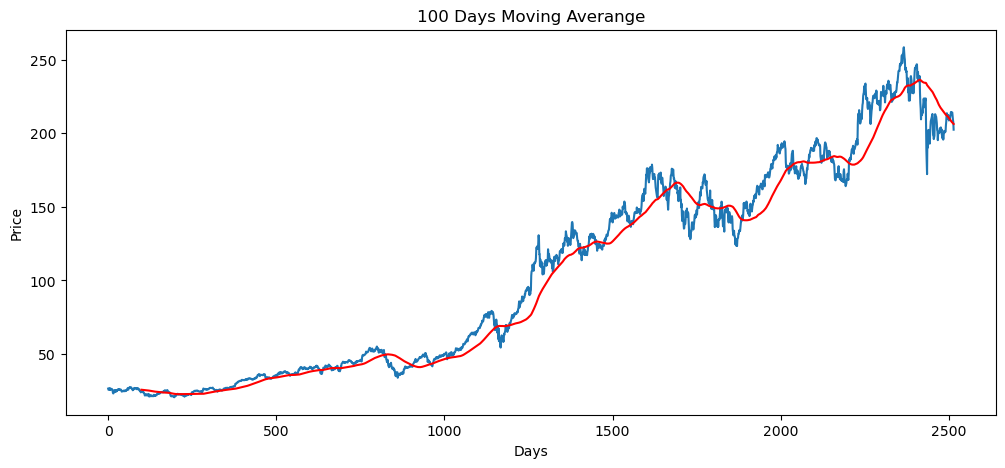

In [27]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Averange')
plt.xlabel('Days')
plt.ylabel('Price')

In [39]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(1003)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-03,26.526636,27.451619,26.320585,27.211974,279904000,NaN,NaN
1,2015-08-04,25.675554,26.360892,25.364241,26.298182,496554400,NaN,NaN
2,2015-08-05,25.845770,26.302662,25.106679,25.297050,397250400,NaN,NaN
3,2015-08-06,25.902012,26.210236,25.674783,26.090996,211612000,NaN,NaN
4,2015-08-07,25.989759,26.153996,25.760280,25.778279,154681600,NaN,NaN
...,...,...,...,...,...,...,...,...
998,2019-07-22,49.764130,49.766530,48.897184,48.906788,89111600,46.383803,NaN
999,2019-07-23,50.153175,50.169988,49.780940,50.061920,73420800,46.471108,NaN
1000,2019-07-24,50.112343,50.227614,49.752116,49.872192,59966400,46.553651,NaN


Text(0, 0.5, 'Price')

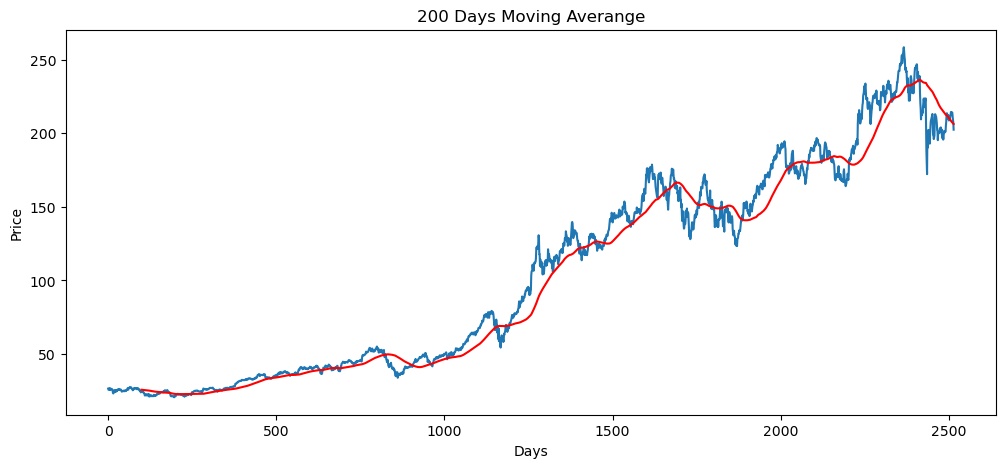

In [40]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Averange')
plt.xlabel('Days')
plt.ylabel('Price')

### Calculating % changed in each trading session

In [42]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,26.526636,NaN
1,25.675554,-0.032084
2,25.845770,0.006629
3,25.902012,0.002176
4,25.989759,0.003388
...,...,...
2510,214.050003,0.000795
2511,211.270004,-0.012988
2512,209.050003,-0.010508


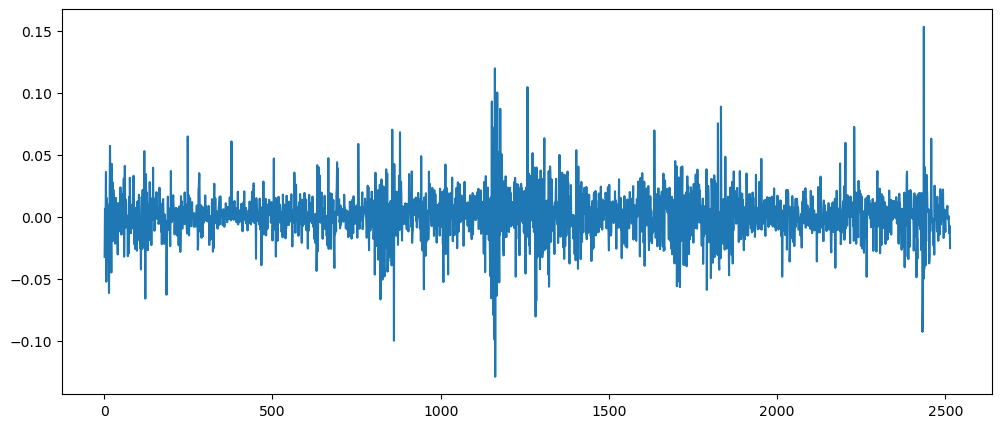

In [44]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed']);

# 4. Data Preprocessing

In [5]:
df.shape

(2515, 5)

In [8]:
# Spliting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker            AAPL
Date                  
2015-08-03   26.526636
2015-08-04   25.675560
2015-08-05   25.845776
2015-08-06   25.902021
2015-08-07   25.989763
...                ...
2022-07-22  151.656937
2022-07-25  150.534927
2022-07-26  149.206238
2022-07-27  154.314285
2022-07-28  154.865433

[1760 rows x 1 columns]
Ticker            AAPL
Date                  
2022-07-29  159.943954
2022-08-01  158.959747
2022-08-02  157.483429
2022-08-03  163.506851
2022-08-04  163.191864
...                ...
2025-07-28  214.050003
2025-07-29  211.270004
2025-07-30  209.050003
2025-07-31  207.570007
2025-08-01  202.380005

[755 rows x 1 columns]


In [ ]:
# Scaling down the data between 0 and 1

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03721044],
       [0.03182382],
       [0.03290115],
       ...,
       [0.8136725 ],
       [0.84600229],
       [0.8494906 ]], shape=(1760, 1))

In [11]:
type(data_training_array)

numpy.ndarray

In [12]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# 6. Model Building

In [34]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [35]:
# ML MODEL
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [41]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(128, activation='tanh', return_sequences=True))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Mdel Training

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - loss: 0.0084
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 5.3644e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 5.0106e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.7961e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 4.4160e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.3030e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.8000e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 4.5770e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.8196e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - loss: 4.4367e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 3.7489e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 4.5262e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 3.8943e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 3.3276e-04
Epoch 15/50
52/52 

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [46]:
data_testing

Ticker,AAPL
Date,
2022-07-29,159.943954
2022-08-01,158.959747
2022-08-02,157.483429
2022-08-03,163.506851
2022-08-04,163.191864
...,...
2025-07-28,214.050003
2025-07-29,211.270004
2025-07-30,209.050003


In [48]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
Date,
2022-03-07,156.554657
2022-03-08,154.726669
2022-03-09,160.141678
2022-03-10,155.788071
2022-03-11,152.063400
...,...
2022-07-22,151.656937
2022-07-25,150.534927
2022-07-26,149.206238


In [49]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)
final_df

Ticker,AAPL
0,156.554657
1,154.726669
2,160.141678
3,155.788071
4,152.063400
...,...
850,214.050003
851,211.270004
852,209.050003
853,207.570007


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.45477390e-01],
       [2.31934275e-01],
       [2.72052753e-01],
       [2.39797939e-01],
       [2.12202765e-01],
       [1.82277658e-01],
       [2.14823911e-01],
       [2.47588687e-01],
       [2.55088334e-01],
       [2.79552513e-01],
       [2.89746222e-01],
       [3.14792941e-01],
       [3.24913847e-01],
       [3.53018871e-01],
       [3.57751313e-01],
       [3.64158910e-01],
       [3.88622976e-01],
       [3.79958928e-01],
       [3.56950590e-01],
       [3.54766151e-01],
       [3.84837090e-01],
       [3.60227079e-01],
       [3.36709004e-01],
       [3.38966359e-01],
       [3.24039868e-01],
       [2.92440171e-01],
       [3.06347303e-01],
       [3.26297110e-01],
       [2.89090879e-01],
       [2.87488980e-01],
       [3.04453964e-01],
       [3.03216307e-01],
       [2.97318447e-01],
       [2.63606888e-01],
       [2.71543468e-01],
       [2.27274636e-01],
       [2.25599708e-01],
       [2.77077087e-01],
       [2.33463371e-01],
       [2.35720840e-01],


In [51]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [52]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [53]:
x_test

array([[[0.24547739],
        [0.23193428],
        [0.27205275],
        ...,
        [0.19103474],
        [0.22887902],
        [0.23296234]],

       [[0.23193428],
        [0.27205275],
        [0.23979794],
        ...,
        [0.22887902],
        [0.23296234],
        [0.27058787]],

       [[0.27205275],
        [0.23979794],
        [0.21220276],
        ...,
        [0.23296234],
        [0.27058787],
        [0.26329612]],

       ...,

       [[0.82682135],
        [0.85449384],
        [0.76873876],
        ...,
        [0.67018691],
        [0.67144638],
        [0.65085005]],

       [[0.85449384],
        [0.76873876],
        [0.71960906],
        ...,
        [0.67144638],
        [0.65085005],
        [0.6344026 ]],

       [[0.76873876],
        [0.71960906],
        [0.69104868],
        ...,
        [0.65085005],
        [0.6344026 ],
        [0.62343767]]], shape=(755, 100, 1))

# 9. Making Predictions

In [54]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [55]:
y_predicted

array([[0.22339986],
       [0.24729282],
       [0.2598297 ],
       [0.25947556],
       [0.2771265 ],
       [0.2889693 ],
       [0.29353675],
       [0.29295522],
       [0.29193377],
       [0.3065163 ],
       [0.31450853],
       [0.33066705],
       [0.34434494],
       [0.35021597],
       [0.35735592],
       [0.35948405],
       [0.3499753 ],
       [0.32915118],
       [0.31591302],
       [0.31173   ],
       [0.32039547],
       [0.3046381 ],
       [0.2849222 ],
       [0.26542616],
       [0.2494745 ],
       [0.24384385],
       [0.23576222],
       [0.22673705],
       [0.22582506],
       [0.22198531],
       [0.22826532],
       [0.25332794],
       [0.23962966],
       [0.22924267],
       [0.21448867],
       [0.20027277],
       [0.20391272],
       [0.21744773],
       [0.21745256],
       [0.21168065],
       [0.19998786],
       [0.19302604],
       [0.19293088],
       [0.18858495],
       [0.16367415],
       [0.13291436],
       [0.12447727],
       [0.134

In [56]:
y_test

array([2.70587868e-01, 2.63296118e-01, 2.52358435e-01, 2.96984501e-01,
       2.94650838e-01, 2.92971500e-01, 2.89466314e-01, 2.89831687e-01,
       3.21375877e-01, 3.15899461e-01, 3.42259240e-01, 3.50218317e-01,
       3.49050072e-01, 3.60148736e-01, 3.57228011e-01, 3.38024325e-01,
       3.09181771e-01, 3.06699110e-01, 3.08889541e-01, 3.27144184e-01,
       2.80339105e-01, 2.63983114e-01, 2.45947220e-01, 2.33606943e-01,
       2.39010442e-01, 2.23311377e-01, 2.13964854e-01, 2.24406705e-01,
       2.13453761e-01, 2.34702158e-01, 2.78951659e-01, 2.08926389e-01,
       2.19660358e-01, 1.98192646e-01, 1.85998654e-01, 2.13599707e-01,
       2.31270228e-01, 2.08050375e-01, 2.00894622e-01, 1.84026859e-01,
       1.86509747e-01, 1.93738529e-01, 1.79718802e-01, 1.25976945e-01,
       9.47248732e-02, 1.25757857e-01, 1.52409640e-01, 1.54600410e-01,
       1.47517460e-01, 1.08525287e-01, 1.10934919e-01, 1.00420264e-01,
       9.57469460e-02, 1.29700994e-01, 9.60392898e-02, 1.25465739e-01,
      

In [57]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [58]:
y_predicted

array([153.57474 , 156.7997  , 158.49187 , 158.44406 , 160.8265  ,
       162.425   , 163.04149 , 162.963   , 162.82512 , 164.79341 ,
       165.87216 , 168.05318 , 169.89935 , 170.69179 , 171.6555  ,
       171.94275 , 170.6593  , 167.84857 , 166.06174 , 165.49713 ,
       166.66675 , 164.5399  , 161.87874 , 159.24725 , 157.09416 ,
       156.33417 , 155.24335 , 154.02518 , 153.90207 , 153.3838  ,
       154.23146 , 157.61429 , 155.76537 , 154.36337 , 152.37195 ,
       150.45314 , 150.94444 , 152.77135 , 152.772   , 151.99292 ,
       150.41469 , 149.475   , 149.46217 , 148.87558 , 145.51323 ,
       141.36142 , 140.22261 , 141.57706 , 143.1327  , 143.74214 ,
       141.83914 , 140.20406 , 138.70747 , 137.57446 , 138.63011 ,
       138.15788 , 138.9467  , 140.23804 , 141.19601 , 141.51768 ,
       143.02634 , 145.07716 , 147.60054 , 147.9972  , 145.96405 ,
       148.60315 , 150.2377  , 149.90118 , 147.04944 , 142.53679 ,
       139.40945 , 138.00224 , 137.75641 , 136.23918 , 139.278

In [59]:
y_test

array([159.94395447, 158.95974731, 157.48342896, 163.5068512 ,
       163.19186401, 162.9651947 , 162.49208069, 162.54139709,
       166.79908752, 166.05990601, 169.61782837, 170.69210815,
       170.53442383, 172.0324707 , 171.63824463, 169.04621887,
       165.15318298, 164.81808472, 165.11373901, 167.57766724,
       161.26013184, 159.05247498, 156.61807251, 154.95243835,
       155.68177795, 153.56278992, 152.30123901, 153.71063232,
       152.23225403, 155.1002655 , 161.07286072, 151.62117004,
       153.06999207, 150.17237854, 148.52648926, 152.25195312,
       154.63703918, 151.50292969, 150.53707886, 148.26034546,
       148.59547424, 149.57118225, 147.67886353, 140.42503357,
       136.20677185, 140.39546204, 143.99279785, 144.28849792,
       143.33247375, 138.06948853, 138.39472961, 136.97550964,
       136.34472656, 140.9276886 , 136.38418579, 140.35603333,
       141.67672729, 141.78514099, 141.32191467, 145.14593506,
       147.29449463, 150.14283752, 147.19593811, 142.71

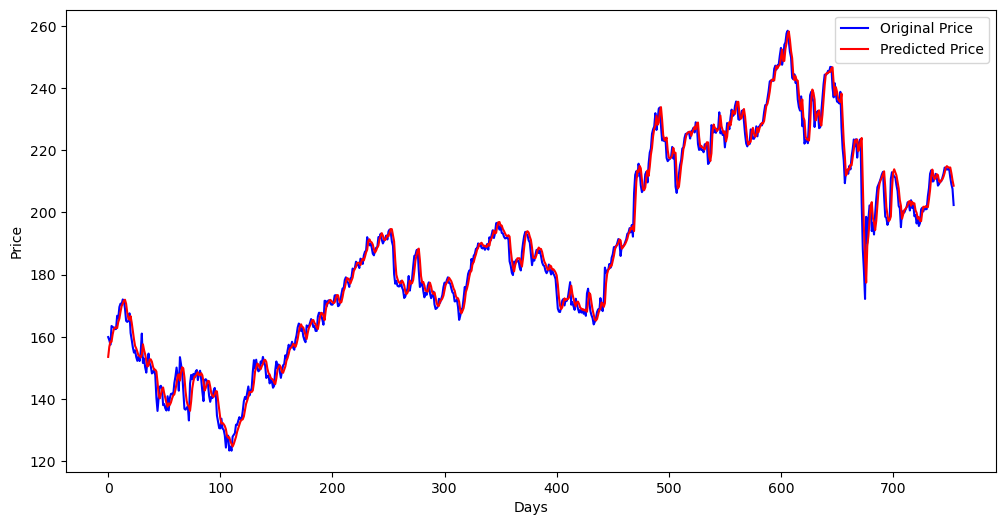

In [65]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();

(140.0, 250.0)

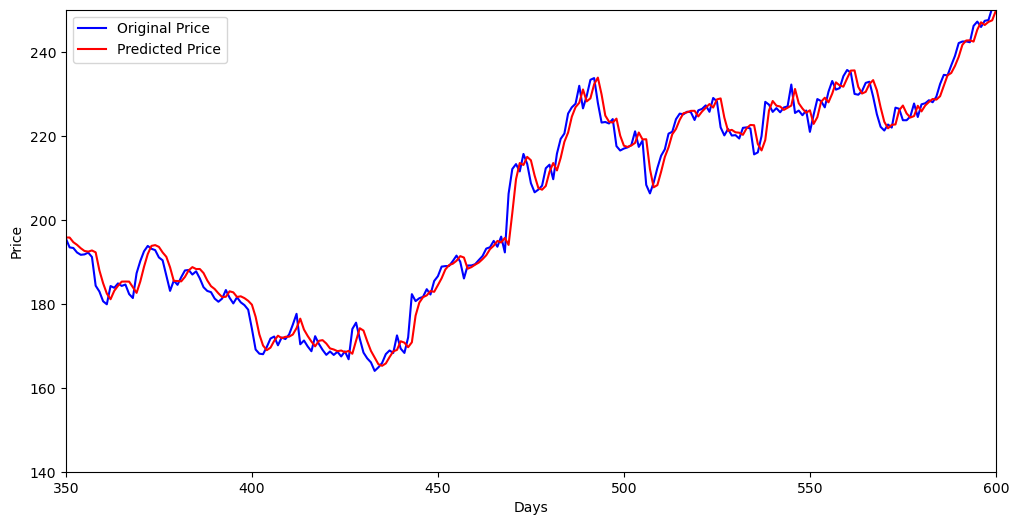

In [64]:
plt.figure(figsize=(12, 6));
plt.plot(y_test, 'b', label='Original Price');
plt.plot(y_predicted, 'r', label='Predicted Price');
plt.xlabel('Days');
plt.ylabel('Price');
plt.legend();
plt.xlim(350, 600)
plt.ylim(140, 250)

# 10. Model Evaluation

In [66]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [67]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 12.707179475603594


In [68]:
# Root Mean Squared Error(RMSE)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (RMSE): 3.5647130986383173


In [69]:
# R-Squared 
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9868618808051404
